 ### Load the drive containing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Defining function to group less represented parties under the 'Others' category

In [3]:
def creating_category_others(data):
  # Using 0.99 quantile to categorize 'Others'
  threshold_value = data['count'].quantile(0.99)
  values_below_thresh = data['count'] < threshold_value
  data.loc[values_below_thresh,'Label'] = 'Others'
  return data

## Loading datasets

In [4]:
# Load dataset containing sport quotes
dataset = pd.read_csv('/content/drive/MyDrive/ADA/ada-sports-quotes/sport-quotes-2019.csv.bz2', compression='bz2', usecols=['speaker','qids','quoteID'])

# Load speaker attributes from Google Drive
speaker_attributes = pd.read_parquet('/content/drive/MyDrive/ADA/Project datasets/speaker_attributes.parquet', columns=['nationality','party','id'])

# Load the database relating qids with wikidata labels
qid_labels = pd.read_csv('/content/drive/MyDrive/ADA/Project datasets/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [5]:
# Removing square brackets and quotation marks from qids to match the speaker_attributes dataset
dataset['qids'] = dataset['qids'].str.strip('[\'\']')
speakers = speaker_attributes[speaker_attributes['id'].isin(dataset['qids'])]

# Removing speakers without any known party (i.e. with 'party' == None)
politicians = speakers[~(speakers['party'].isna())]

## Computing the number of speakers per party from sport quotes

Only keeping the first qid for the 'party' feature. It is known, that it is not correct because we should select the party in which the speaker was at the time of the quote. This will be solved for Milestone 3, as this requires new speaker_features dataset to obtain this information. 

In [6]:
# Only keeping the first qid in the 'party' feature (with str.get(0))
# Counts the occurences of each party and adding the corresponding party label by merging qid_labels
party_speaker_counts_label = pd.DataFrame(pd.value_counts(politicians['party'].str.get(0))).merge(qid_labels, left_index=True, right_on='QID').rename(columns={'party': 'count'})

# Setting label of party with count lower than the 0.99 quantile to 'Others'
party_speaker_counts_label = creating_category_others(party_speaker_counts_label)

## Computing the number of quotes per party from sport quotes

In [7]:
# Selecting quotes from a speaker with a party and merging the speaker_attributes dataset
dataset_politicians_attributes = dataset[dataset['qids'].isin(politicians['id'])].merge(speaker_attributes, left_on='qids', right_on='id')
# Only keeping the first qid in the 'party' feature (with str.get(0))
dataset_politicians_attributes['party'] = dataset_politicians_attributes['party'].str.get(0)

# Counts the occurences of each party and add the corresponding party label 
party_quotes_counts_label = pd.DataFrame(pd.value_counts(dataset_politicians_attributes['party'])).merge(qid_labels, left_index=True, right_on='QID').rename(columns={'party': 'count'})

# Setting label of party with count lower than the 0.99 quantile to 'Others'
party_quotes_counts_label = creating_category_others(party_quotes_counts_label)

## Plots : pie plots and bar plots

Speaker's party distribution

Text(0.6, 0.92, "Speaker's party distribution of sport quotes for year 2019")

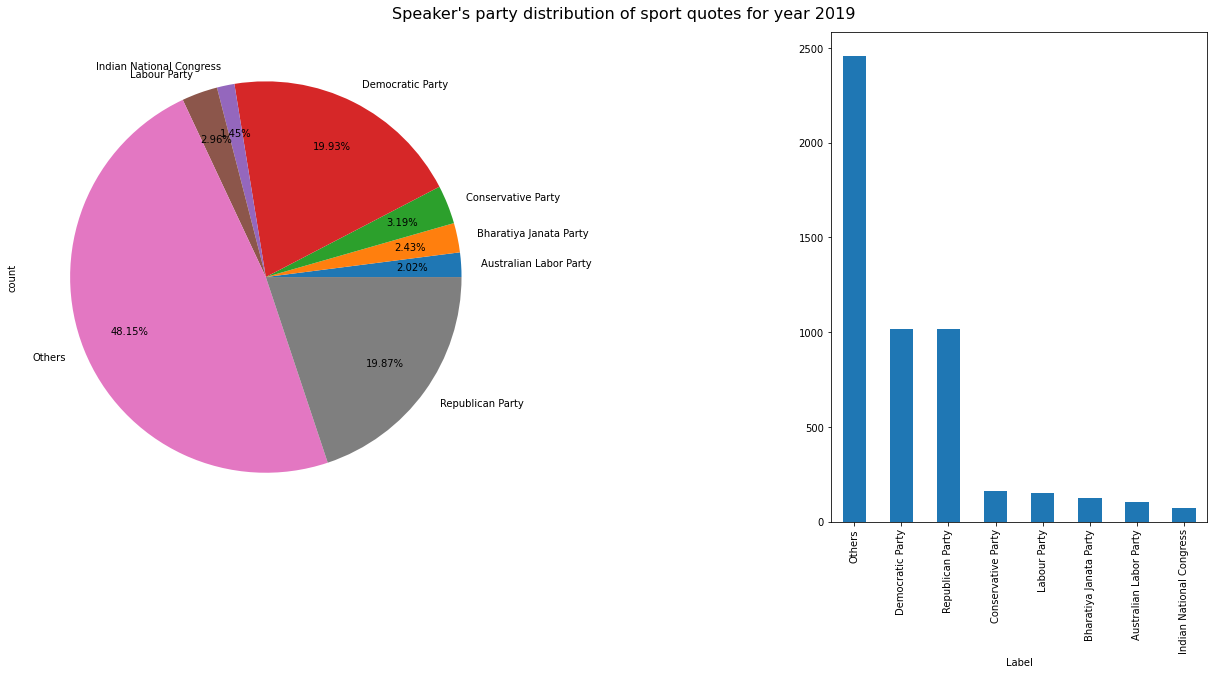

In [8]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(27,9))

party_speaker_counts_label.groupby('Label').sum().plot(kind='pie', subplots=True, legend=False, autopct='%1.2f%%', ax=axes[0], pctdistance=0.75)
party_speaker_counts_label.groupby('Label').sum().sort_values(by='count', ascending=False).plot(kind='bar',legend=False, log=False, ax=axes[1])

plt.subplots_adjust(wspace=0)
fig.suptitle('Speaker\'s party distribution of sport quotes for year 2019', fontsize=16, x=0.6, y=0.92)

Quote's party distribution

Text(0.6, 0.92, "Quote's party distribution of sport quotes for year 2019")

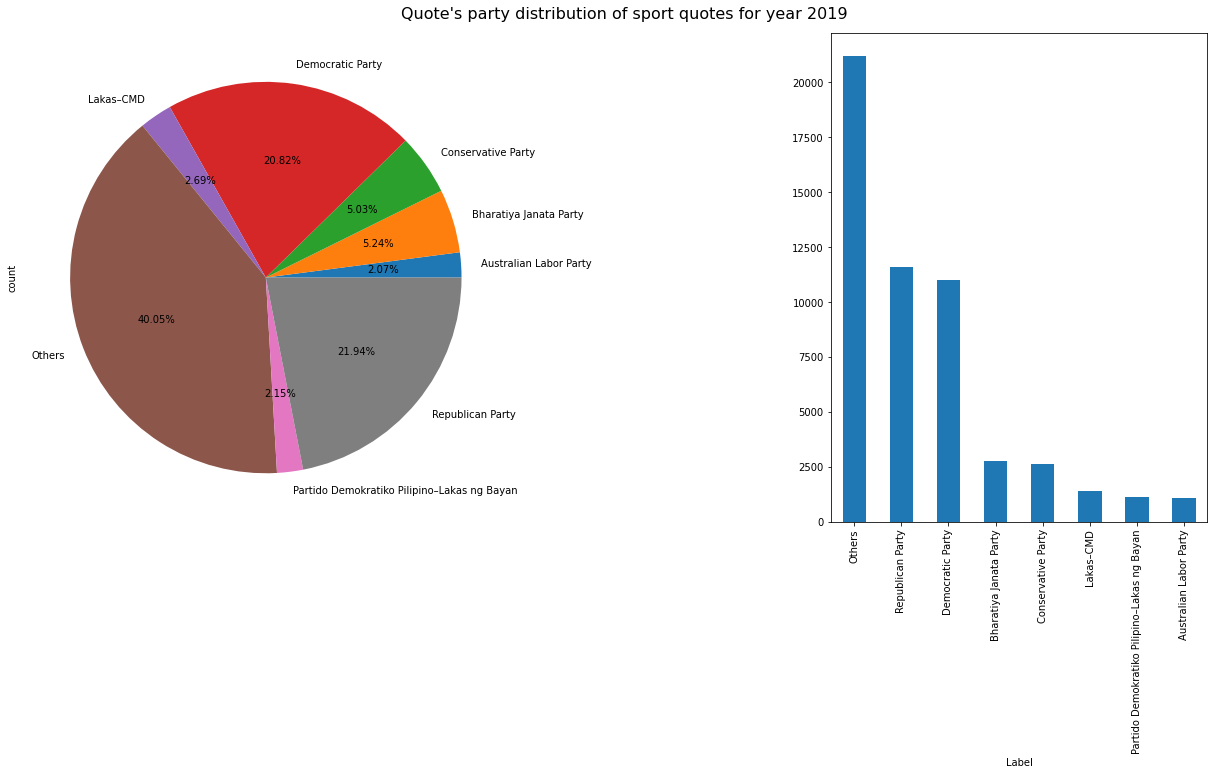

In [9]:
fig, axes = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(27,9))

party_quotes_counts_label.groupby('Label').sum().plot(kind='pie', subplots=True, legend=False, autopct='%1.2f%%', ax=axes[0])
party_quotes_counts_label.groupby('Label').sum().sort_values(by='count', ascending=False).plot(kind='bar',legend=False, log=False, ax=axes[1])

plt.subplots_adjust(wspace=0)
fig.suptitle('Quote\'s party distribution of sport quotes for year 2019', fontsize=16, x=0.6, y=0.92)

## Data description and overview

Lengths of DataFrame (i.e. number of sample)

In [10]:
print('Number of sport quotes: {q_sport}\nNumber of political quotes: {q_pol}\nNumber of speakers: {spea}\nNumber of politicians (i.e. speakers with political party): {pol}\nNumber of different parties: {part}'\
      .format(q_sport=dataset.shape[0], spea=speakers.shape[0], pol=politicians.shape[0], part=party_speaker_counts_label.shape[0], q_pol=dataset_politicians_attributes.shape[0]))

Number of sport quotes: 2922983
Number of political quotes: 52910
Number of speakers: 64583
Number of politicians (i.e. speakers with political party): 5107
Number of different parties: 667


In [11]:
dataset.sample(5)

,quoteID,speaker,qids
589640,2019-01-02-061961,Tyrone Crawford,Q599740
2810527,2019-02-12-115232,Brett Brown,Q2924590
1178733,2019-06-27-035719,Alex Dowsett,Q2092183
340754,2019-04-04-095070,CLARE WILLIAMS,Q42839568
2395509,2019-10-02-062230,Michael Norman,"Q21066271', 'Q6833094', 'Q6833096"


In [12]:
speakers.sample(5)

,nationality,party,id
5680,"[Q1028, Q29999]",None,Q113246
1286866,"[Q258, Q664]",None,Q5596204
8445142,None,None,Q50875012
1416464,[Q16],None,Q15441936
5692117,[Q77],None,Q936640


In [13]:
politicians.sample(5)

,nationality,party,id
5943218,[Q30],[Q29468],Q15488345
30253,[Q30],[Q29468],Q881196
3780595,[Q16],[Q138345],Q22770985
4561694,[Q30],[Q29552],Q970720
1333772,"[Q159, Q15180]",[Q151469],Q7453960


In [14]:
party_speaker_counts_label.head(5)

,count,Label,Description
QID,,,
Q29552,1018,Democratic Party,political party in the United States
Q29468,1015,Republican Party,major political party in the United States
Q9626,163,Conservative Party,political party in the United Kingdom
Q9630,151,Labour Party,political party in the United Kingdom
Q10230,124,Bharatiya Janata Party,major political party in India


In [15]:
dataset_politicians_attributes.sample(5)

,quoteID,speaker,qids,nationality,party,id
39835,2019-01-08-103238,Wendell Mitchell,Q7982456,[Q30],Q29552,Q7982456
26756,2019-10-21-079553,Shinzo Abe,Q132345,[Q17],Q232595,Q132345
43457,2019-01-23-105601,Crystal Quade,Q47029488,None,Q29552,Q47029488
47952,2019-06-10-098021,Danilo Medina,Q57429,[Q786],Q2511535,Q57429
33886,2019-09-28-056080,Toby Barrett,Q7811767,[Q16],Q826977,Q7811767


In [16]:
party_quotes_counts_label.head(5)

,count,Label,Description
QID,,,
Q29468,11610,Republican Party,major political party in the United States
Q29552,11017,Democratic Party,political party in the United States
Q10230,2775,Bharatiya Janata Party,major political party in India
Q9626,2662,Conservative Party,political party in the United Kingdom
Q6474567,1424,Lakas–CMD,political party in the Philippines
